In [15]:
import pandas as pd
import os
import json
import numpy as np
import gender_guesser.detector as gender
import matplotlib.pyplot as plt
from nameparser import HumanName
from ethnicolr import pred_census_ln

In [16]:
path_connected_data = "C:\\Users\\tykun\\OneDrive\\Documents\\SchoolDocs\\VSCodeProjects\\connectedData\\"
path_temp_data = "C:\\Users\\tykun\\OneDrive\\Documents\\SchoolDocs\\VSCodeProjects\\connectedData\\temporaryData\\"
year = "2009"
valid_years = ["1999", "2000", "2005", "2008", "2009"]

path_read = f"{path_connected_data}{year}_split_positions.csv"
president_path = f"{path_temp_data}{year}_deans.csv"

In [17]:
#count number of female and male presidents per year:
numbers_by_year = {}
d = gender.Detector()
for year in valid_years:
    current_year_dict = {'male': 0, 'female': 0, 'unknown': 0, "andy": 0}
    president_path = f"{path_temp_data}{year}_boards.csv"
    president_path = f"{path_connected_data}{year}_split_positions.csv"
    president_df = pd.read_csv(president_path)
    for index, row in president_df.iterrows():
        name = HumanName(row["Name"])
        first_name = str(name.first)
        institution = row["Institution"]
        current_gender = d.get_gender(first_name)
        if current_gender in ['male', 'female']:
            current_year_dict[current_gender] += 1
        else:
            current_year_dict['unknown'] += 1
    numbers_by_year[year] = current_year_dict
        

df = pd.DataFrame(numbers_by_year).T


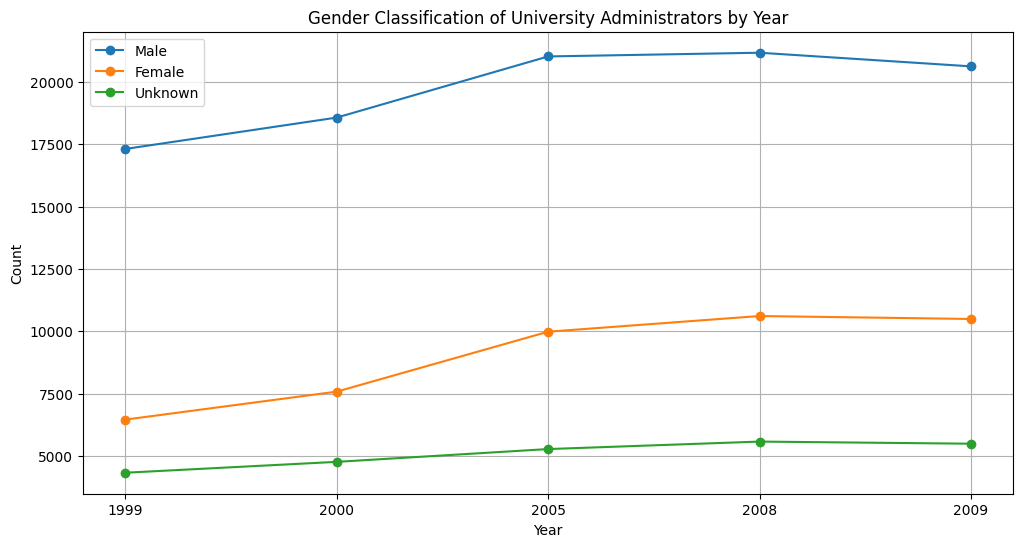

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['male'], label='Male', marker='o')
plt.plot(df.index, df['female'], label='Female', marker='o')
plt.plot(df.index, df['unknown'], label='Unknown', marker='o')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Gender Classification of University Administrators by Year')
plt.legend()
plt.grid(True)
plt.show()

Index(['Name', 'Position', 'AffiliationId', 'Institution', 'SubInstitution',
       'carnegie_id', 'PrimarySample', 'Education', 'Other Affiliation',
       'Career', 'Notes', 'last_name', 'api', 'black', 'hispanic', 'white',
       'race'],
      dtype='object')
Index(['Name', 'Position', 'AffiliationId', 'Institution', 'SubInstitution',
       'carnegie_id', 'PrimarySample', 'Education', 'Other Affiliation',
       'Career', 'page', 'last_name', 'api', 'black', 'hispanic', 'white',
       'race'],
      dtype='object')
Index(['Name', 'Position', 'AffiliationId', 'Institution', 'SubInstitution',
       'carnegie_id', 'PrimarySample', 'Education', 'Other Affiliation',
       'Career', 'Notes', 'page', 'last_name', 'api', 'black', 'hispanic',
       'white', 'race'],
      dtype='object')
Index(['Name', 'Position', 'AffiliationId', 'Institution', 'SubInstitution',
       'carnegie_id', 'PrimarySample', 'Education', 'Other Affiliation',
       'Career', 'Notes', 'page', 'last_name', 'api

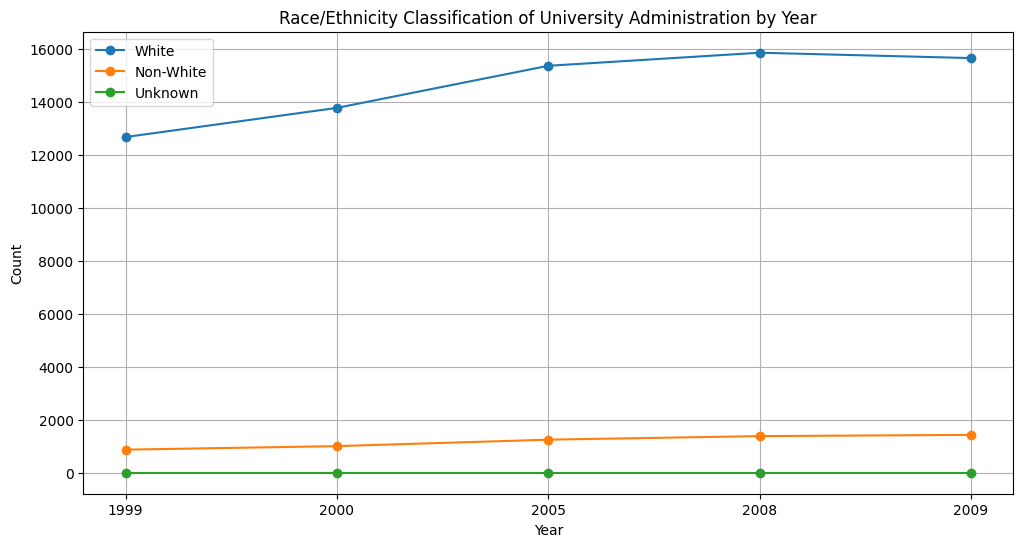

In [19]:
def get_last_name(full_name):
    full_name = HumanName(full_name)
    return str(full_name.last)

# Iterate through each year
for year in valid_years:
    # Initialize the dictionary for the current year
    current_year_dict = {'white': 0, 'poc': 0, 'unknown': 0}
    
    # Define the path to the current year's data file
    president_path = f"{path_temp_data}{year}_boards.csv"
    president_path = f"{path_connected_data}{year}_split_positions.csv"
    
    # Read the data file into a dataframe
    president_df = pd.read_csv(president_path)
    
    # Extract last names and predict ethnicity
    president_df['last_name'] = president_df['Name'].apply(get_last_name)
    president_df = pred_census_ln(president_df, 'last_name')
    
    # Print the dataframe columns for debugging
    print(president_df.columns)
    
    # Classify as 'white' or 'poc' based on the ethnicity prediction
    for index, row in president_df.iterrows():
        ethnicity = row['race']  # Use the correct column name
        if ethnicity == 'white':
            current_year_dict['white'] += 1
        elif ethnicity in ['api', 'black', 'hispanic', 'aian']:
            current_year_dict['poc'] += 1
        else:
            current_year_dict['unknown'] += 1
    
    # Add the current year's dictionary to the numbers_by_year dictionary
    numbers_by_year[year] = current_year_dict

# Convert the dictionary to a DataFrame for easier plotting
df = pd.DataFrame(numbers_by_year).T

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['white'], label='White', marker='o')
plt.plot(df.index, df['poc'], label='Non-White', marker='o')
plt.plot(df.index, df['unknown'], label='Unknown', marker='o')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Race/Ethnicity Classification of University Administration by Year')
plt.legend()
plt.grid(True)
plt.show()